# Documentation by example for `shap.dependence_plot`

This notebook is designed to demonstrate (and so document) how to use the `shap.dependence_plot` function. It uses an XGBoost model trained on the classic UCI adult income dataset (which is classification task to predict if people made over 50k in the 90s).

In [1]:
import xgboost
import shap

# train XGBoost model
X,y = shap.datasets.adult()
model = xgboost.XGBClassifier().fit(X, y)

# compute SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

## Simple dependence plot

A dependence plot is a scatter plot that shows the effect a single feature has on the predictions made by the model. In this example the log-odds of making over 50k increases significantly between age 20 and 40.

- Each dot is a single prediction (row) from the dataset.
- The x-axis is the value of the feature (from the X matrix).
- The y-axis is the SHAP value for that feature, which represents how much knowing that feature's value changes the output of the model for that sample's prediction. For this model the units are log-odds of making over 50k annually.
- The color corresponds to a second feature that may have an interaction effect with the feature we are plotting (by default this second feature is chosen automatically). If an interaction effect is present between this other feature and the feature we are plotting it will show up as a distinct vertical pattern of coloring. For the example below 20-year-olds with a high level of education are less likely make over 50k than 20-year-olds with a low level of education. This suggests an interaction effect between Education-Num and Age.

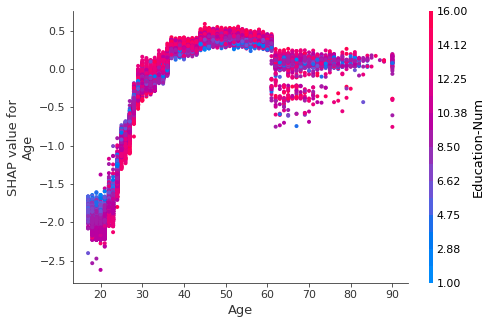

In [2]:
# The first argument is the index of the feature we want to plot
# The second argument is the matrix of SHAP values (it is the same shape as the data matrix)
# The third argument is the data matrix (a pandas dataframe or numpy array)
shap.dependence_plot(0, shap_values, X)

## Other ways to make the same plot

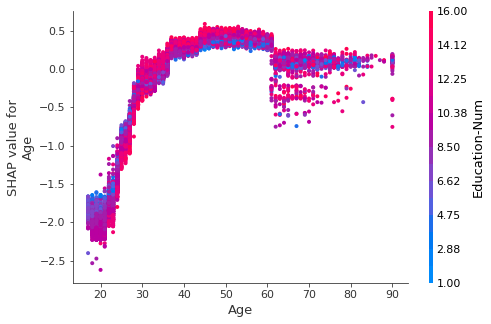

In [3]:
# If we pass a numpy array instead of a data frame then we
# need pass the feature names in separately
shap.dependence_plot(0, shap_values, X.values, feature_names=X.columns)

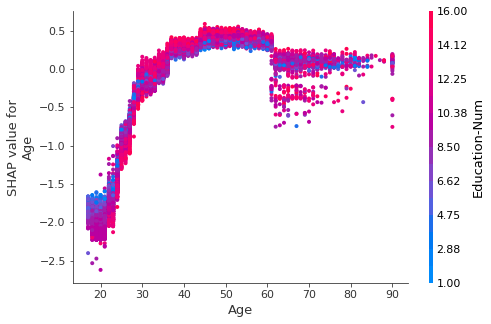

In [4]:
# We can pass a feature name instead of an index
shap.dependence_plot("Age", shap_values, X)

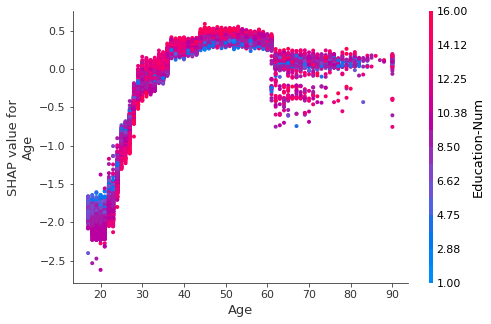

In [5]:
# We can also use the special "rank(i)" systax to specify the i'th most
# important feature to the model. As measured by: np.abs(shap_values).mean(0)
# In this example age is the second most important feature.
shap.dependence_plot("rank(1)", shap_values, X)

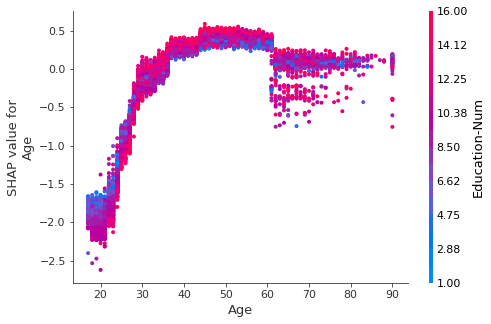

In [6]:
# The interaction_index argument can be used to explicitly
# set which feature gets used for coloring
shap.dependence_plot("rank(1)", shap_values, X, interaction_index="Education-Num")

## Exploring different interaction colorings

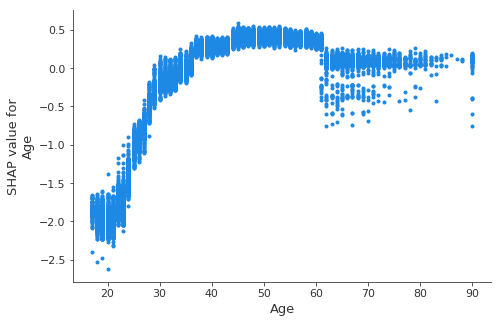

In [7]:
# we can turn off interaction coloring
shap.dependence_plot("Age", shap_values, X, interaction_index=None)

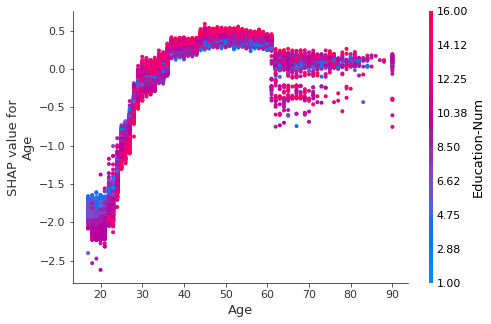

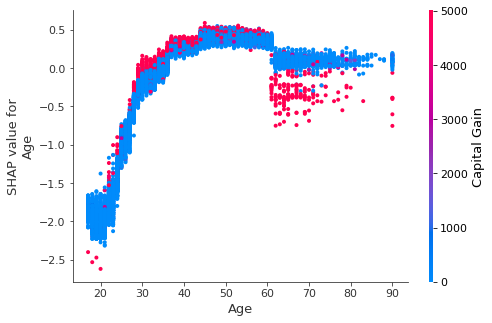

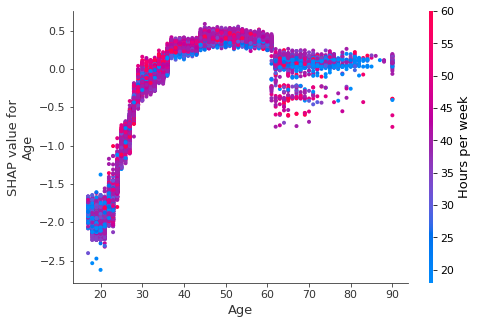

In [8]:
# we can use shap.approximate_interactions to guess which features
# may interact with age
inds = shap.approximate_interactions("Age", shap_values, X)

# make plots colored by each of the top three possible interacting features
for i in range(3):
    shap.dependence_plot("Age", shap_values, X, interaction_index=inds[i])

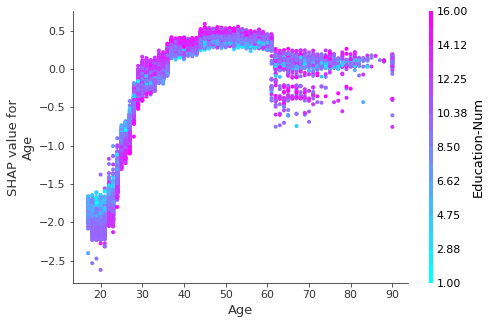

In [9]:
import matplotlib.pyplot as plt

# you can use the cmap parameter to provide your own custom color map
shap.dependence_plot("Age", shap_values, X, cmap=plt.get_cmap("cool"))

## Customizing the figure properties

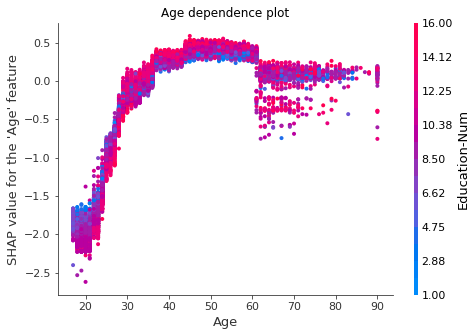

In [10]:
# by passing show=False you can prevent shap.dependence_plot from calling
# the matplotlib show() function, and so you can keep customizing the plot
# before eventually calling show yourself
shap.dependence_plot(0, shap_values, X, show=False)
plt.title("Age dependence plot")
plt.ylabel("SHAP value for the 'Age' feature")
# plt.savefig("my_dependence_plot.pdf") # we can save a PDF of the figure if we want
plt.show()

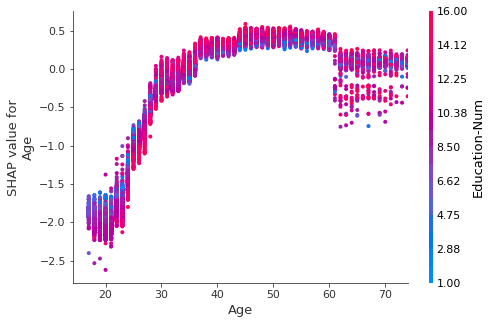

In [11]:
# you can use xmax and xmin with a percentile notation to hide outliers
shap.dependence_plot(0, shap_values, X, xmin="percentile(1)", xmax="percentile(99)")

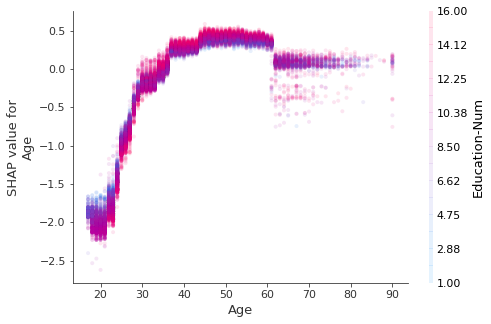

In [12]:
# transparency can help reveal dense vs. sparse areas of the scatter plot
shap.dependence_plot(0, shap_values, X, alpha=0.1)

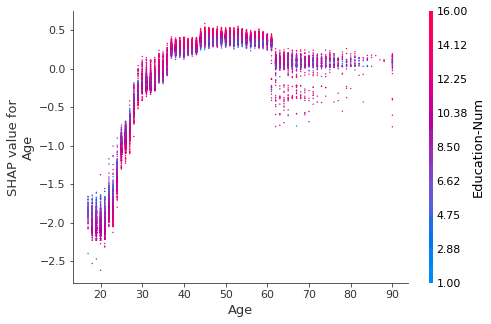

In [13]:
# an alternative to transparency is to reduce the dot size
shap.dependence_plot(0, shap_values, X, dot_size=2)

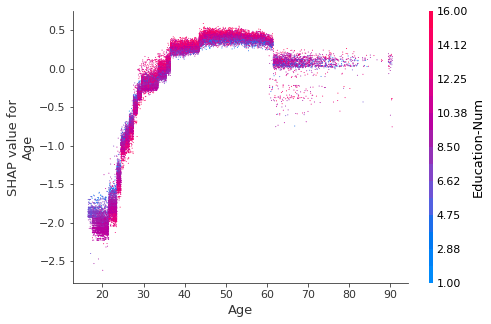

In [14]:
# for categorical (or binned) data adding a small amount of x-jitter makes
# thin columns of dots more readable
shap.dependence_plot(0, shap_values, X, x_jitter=1, dot_size=1)

<hr>
Have an idea for more helpful examples? Pull requests that add to this documentation notebook are encouraged! 